In [1]:
# import
%reload_ext autoreload
%autoreload 2

import torch
# from functions.trainer import Trainer
from options import update_options, options, reset_options
import argparse
from tensorboardX import SummaryWriter
from easydict import EasyDict as edict
from pathlib import Path
import numpy as np
import matplotlib as plt
import k3d
import trimesh
import torch
import skimage

import json
import os
import pickle

import numpy as np
import torch
from PIL import Image
from skimage import io, transform
from torch.utils.data.dataloader import default_collate

import config
from datasets.base_dataset import BaseDataset
import matplotlib.pyplot as plt
from torchvision.transforms import Normalize

from utils.visualization import visualize_occupancy, visualize_pointcloud, visualize_mesh
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import PIL
from PIL import Image
from aflwnet import *

from functions.predictor import *

/root/miniconda3/envs/3dproject/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
pred_op = options
pred_op.checkpoint = "checkpoints/042000_000079.pt"
pred_op.load_author_checkpoint = False

import pprint
from logger import create_logger
logger = create_logger(options, phase='pred')
options_text = pprint.pformat(vars(options))
logger.info(options_text)
writer = SummaryWriter(pred_op.summary_dir)

predictor = Predictor(pred_op, logger, writer)
predictor.model

{'checkpoint': 'checkpoints/042000_000079.pt',
 'checkpoint_2d': False,
 'checkpoint_3d': True,
 'checkpoint_dir': 'checkpoints',
 'dataset': {'camera_c': [111.5, 111.5],
             'camera_f': [25.0, 25.0],
             'mesh_pos': [0.0, 0.0, 0.0],
             'name': 'aflw2000',
             'normalization': True,
             'num_classes': 1,
             'predict': {'folder': 'experiments/test_image'},
             'shapenet': {'num_points': 20000,
                          'resize_with_constant_border': False},
             'subset_eval': 'eval_aflw',
             'subset_train': '1'},
 'initial_semi': True,
 'load_author_checkpoint': False,
 'log_dir': 'logs',
 'log_level': 'info',
 'loss': {'weights': {'chamfer': [0.5, 1.0, 1.0, 1.0],
                      'chamfer_opposite': 1.0,
                      'constant': 1.0,
                      'edge': 0.1,
                      'laplace': 0.3,
                      'move': 0.1,
                      'normal': 0.00016,
         

P2MModel(
  (nn_encoder): VGGFace(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): 

In [3]:
from utils.visualization import *
out = predictor.predict()

pts = out['pred_coord'][-1].cpu().numpy().reshape(-1,3)

visualize_pointcloud(pts, .0010)



Running predictions...
Predicting [00000/00200]
THCudaCheck FAIL file=/pytorch/aten/src/THC/THCGeneral.cpp line=383 error=11 : invalid argument


Output()

In [4]:
#uncomment to visul mesh
fc = predictor.ellipsoid.faces[-1].cpu().numpy()
visualize_mesh(pts,fc)

Output()

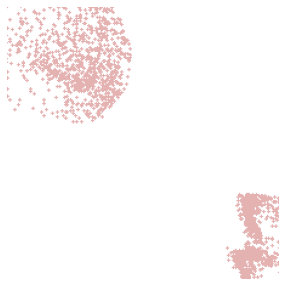

In [7]:
f = [28.,28.]
c = [115.5, 115.5]

# renderer._render_pointcloud(gt_data[0]['points'], )
c_k = np.array([[f[0], 0, c[0]], [0, f[1], c[1]],[0, 0, 1]])
d_coeffs = np.zeros(5, dtype=np.float32)
rvec = np.array([0., 0., 0.], dtype=np.float32)
tvec = np.array([50., 50., 50.], dtype=np.float32)
# rmesh, _= predictor.renderer._render_mesh(pts,fc,224,224, camera_k=c_k, camera_dist_coeffs=d_coeffs,rvec=rvec, tvec=tvec)
rmesh, _= predictor.renderer._render_pointcloud(pts,224,224, camera_k=c_k, camera_dist_coeffs=d_coeffs,rvec=rvec, tvec=tvec)

plt.figure(figsize=(5,5))
plt.imshow(np.transpose(rmesh, (2,1,0)))
plt.axis('off')
plt.show()
